$\textbf{Delay Power Spectrum}$

The delay power spectrum $\textit{P}(\textit{k}_{\parallel},\textit{k}_{\perp})$ is related to the diagonal of covariance matrix of the Fourier domain visibility $\textit{u}(\mathbf{u},\tau)$ as follows

\begin{equation}
\textit{P}(\textit{k}_{\parallel},\textit{k}_{\perp}) = \Big(\frac{\lambda^2}{2\textit{k}_{\textrm{B}}}\Big)^2\Big(\frac{\textit{D}^2\Delta \textit{D}}{\Delta\textit{B}}\Big)\Big(\frac{1}{\Omega\Delta \textit{B}}\Big) \langle |\textit{u}(\mathbf{u},\tau)|^2\rangle
\end{equation}
where 

\begin{equation}
\textit{k}_{\perp} = \frac{2\pi\mathbf{b}}{\lambda\textit{D}(\textit{z})}
\end{equation}
and 
\begin{equation}
\textit{k}_{\parallel} \approx\frac{2\pi\tau}{\Delta \textit{D}(\textit{z})}
\end{equation}
are wavenumber in the line-of-sight and transeverse directions. Here $\textit{D}(\textit{z})$ is the transeverse comoving distance at redshift $\textit{z}$, and $\Delta \textit{D}(\textit{z})$ is the line-of-sight comoving width of the   observation bandwidth at redshift $\textit{z}$, if $\textit{B}$ is set to be bandwidth;

\begin{equation}
\Delta \textit{D}(\textit{z}) \approx\frac{\textit{c}(1+\textit{z})^2}{\textit{H}_0\textit{f}_{21}\textit{E}(\textit{z})}\Delta \textit{B}
\end{equation}
where $\textit{c}$ is the speed of light in vaccum, and $\textit{H}_0$ and $E(z)=[\Omega _{\rm M}(1+z)^3+\Omega _k(1+z)^2+\Omega _\Lambda ]^{1/2}$ are standard terms in cosmology. The effective bandwidth is given by
\begin{equation}
\Delta\textit{B} = \int_{-\textit{B}/2}^{\textit{B}/2} \textit{W}(\textit{f})\textit{d}\textit{f}
\end{equation}
and 
\begin{equation}
\Omega = \int_{4\pi}\textit{A}(\hat{s},\textit{f})\textit{d}\Omega
\end{equation}

where $\textit{W}(\textit{f})$  and $\textit{A}(\hat{s},\textit{f})$ is window function at frequency $\textit{f}$ and antenna angular response at function positon $\hat{s}$ in celestial sphere, respectively. The delay visibility are given by

\begin{equation}
\textit{u}(\mathbf{u},\tau) = \int \textit{u}(\mathbf{u},\textit{f})\textit{e}^{-j2\pi\textit{f}\tau} \textit{d}\textit{f}
\end{equation}
where $\tau$ is a Fourier conjugate of $\textit{f}$. Here $j=\sqrt{-1}$, $\lambda$ is the observing wavelenght and $\textit{k}_{\textrm{B}}$.

reference

https://iopscience.iop.org/article/10.1088/0004-637X/776/1/6

$\textbf{Comoving Transverse Distance $ \textit{D}$}$

In [1]:
import numpy as np; 
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM 
import scipy.integrate  as intg
from scipy.integrate import dblquad
from scipy import signal
import scipy.constants as CNST1
import beam_simulator as sb

Text(0,0.5,'Comoving Distance [Mpc]')

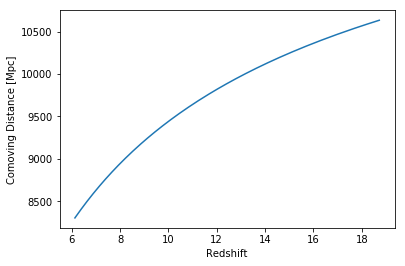

In [2]:
cosm = FlatLambdaCDM(70.0,0.3) #standard cosmology

get_redshift = lambda f_0,f: (f_0/f) -1.0
f_0 = 1420
frqs = np.arange(72.0,200.0,1.0)
z_values = [get_redshift(f_0,frqs[j]) for j in range(frqs.size)]

comoving_distance= cosm.comoving_transverse_distance(z_values)

plt.plot(z_values,comoving_distance)
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance [Mpc]')

$\textbf{Bandwidth $\Delta \textit{B}$}$

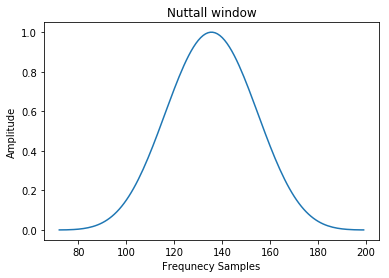

Bandwidth is 46.17490919772398 MHz


In [3]:
def get_bandwidth(window_func,frqs,dfreq =1.0):
    "This function compute the bandwidth given the window function as an array, and freqs array where it is sampled"
    
    bandwidth = intg.simps(window_func,frqs,dfreq)
    
    return bandwidth

window = signal.nuttall(frqs.size)


plt.plot(frqs,window)
plt.title("Nuttall window")
plt.ylabel("Amplitude")
plt.xlabel("Frequnecy Samples")
plt.show()

print 'Bandwidth is', get_bandwidth(window,frqs),'MHz'

$\textbf{Line-of-sight Comoving Width $\Delta \textit{D}$}$

Text(0,0.5,'Comoving Width [Mpc. MHz]')

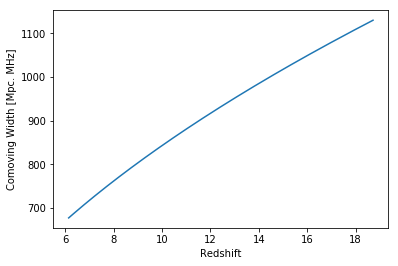

In [52]:
def get_comoving_width(z_values,bandwidth,f_21=1420):

    c = 3e8 # speed of light in vaccum
    comv_width = ((c*(np.ones(len(z_values))+z_values)**2)/(f_21*cosm.H(z_values)*1000))*bandwidth
    
    return comv_width


    
    
    
get_comoving_width(z_values,get_bandwidth(window,frqs))

plt.plot(z_values,get_comoving_width(z_values,get_bandwidth(window,frqs)))
plt.xlabel('Redshift')
plt.ylabel('Comoving Width [Mpc. MHz]')


$\textbf{Total Solid Angle $\Omega$}$

In [5]:
def omega_gaussian_beam(dish_diam,frqs,dfrqs=1.0):
    omeg_frq = np.zeros(len(frqs))
    for freq_i in range(frqs.size):
        sigma_value = sb.sigma_func(dish_diam,frqs[freq_i]) 
        omeg_frq[freq_i] = dblquad(lambda theta,phi,sigma_fwhm,theta_error,phi_error,sigma_error : sb.gaussian_beam(theta,phi,sigma_fwhm,theta_error,phi_error,sigma_error),-np.pi,np.pi,-np.pi/2.0,np.pi/2.0, args=(sigma_value,0.0,0.0,0.0))[0]
    Omega = intg.simps(omeg_frq,frqs,dfrqs)
    
    return Omega

omega_gaussian_beam(14.0,frqs)

2506.8795167341814

$\textbf{Delay Visibility}$

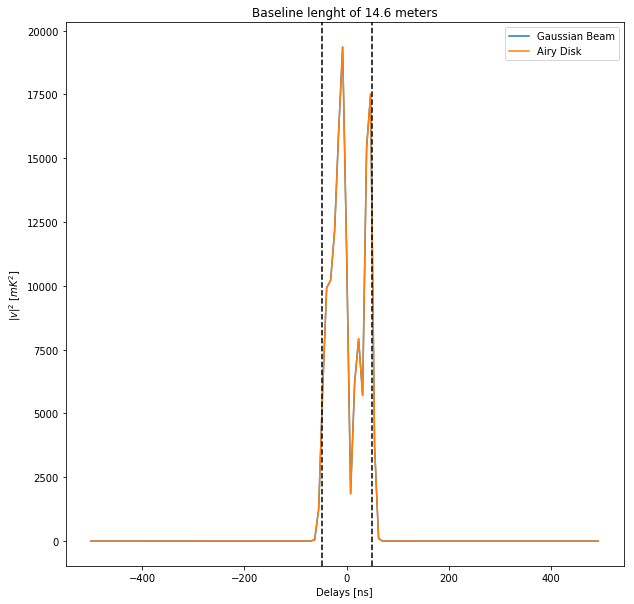

In [36]:
vd_gaussian_beam = np.load('SB_Visibilitity_simulation_GB_GLEAM_BSRC_72_200MHz_LST.npy')
vd_airy_disk_beam = np.load('SB_Visibilitity_simulation_AD_GLEAM_BSRC_72_200MHz_LST.npy')


frq_mid = 150 # Central frequency in MHz
c=3e8
jy2mK = 1e-26*(c/(frq_mid*1e6))**2/(2*CNST1.k)*1e3

data_gb = vd_gaussian_beam[0]*jy2mK

data_ad = vd_airy_disk_beam[0]*jy2mK
ant1_pos = np.array([0.0,0.0,0.0]) # reference antenna position in ENU coordinate system
ant2_pos = np.array([14.6,0.0,0.0])
bl = np.linalg.norm(ant2_pos-ant1_pos)

def geometric_delay(bl):
    return bl/c

g_dl = geometric_delay(bl)*10**9
def get_delay_vis(data,window,frqs):
    delay_data=np.fft.ifft(window*data)
    delaydata_shift=np.fft.fftshift(delay_data)
    delays = np.fft.fftfreq(frqs.size,frqs[1]-frqs[0])
    delays = np.fft.fftshift(delays)
    
    return [delays,delaydata_shift]



plt.figure(figsize=(10,10))
plt.title("Baseline lenght of 14.6 meters")
plt.plot(get_delay_vis(data_gb,window,frqs*10**-3)[0],np.abs(get_delay_vis(data_gb,window,frqs)[1])**2,label='Gaussian Beam')
plt.plot(get_delay_vis(data_ad,window,frqs*10**-3)[0],np.abs(get_delay_vis(data_ad,window,frqs)[1])**2,label='Airy Disk')
plt.axvline(g_dl, ls="dashed",color='black')
plt.axvline(-g_dl,ls="dashed",color='black')
plt.xlabel('Delays [ns]')
plt.ylabel('$|v|^2$ [$mK^2$]')
plt.legend(loc='best')
plt.show()




$\textbf{Delay Visibility Waterfalls}$

In [46]:
ddata_gb = np.array([get_delay_vis(vd_gaussian_beam[lst_i]*jy2mK,window,frqs*10**-3)[1] for lst_i in range(vd_gaussian_beam.shape[0])])

ddata_ad = np.array([get_delay_vis(vd_airy_disk_beam[lst_i]*jy2mK,window,frqs*10**-3)[1] for lst_i in range(vd_gaussian_beam.shape[0])])

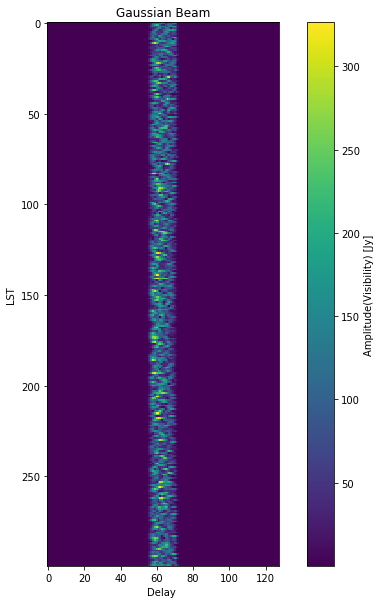

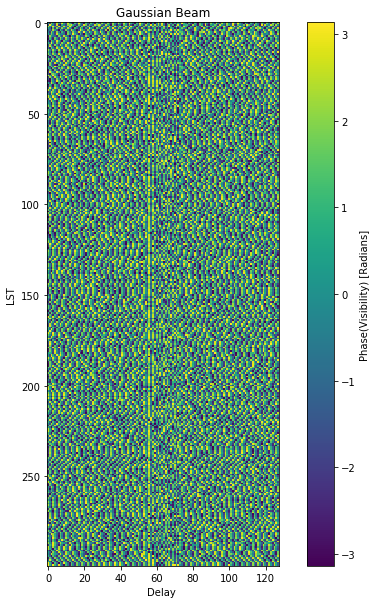

In [49]:
plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.abs(ddata_gb[:300,:]))
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Gaussian Beam")
plt.imshow(np.angle(ddata_gb[:300,:]))
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()


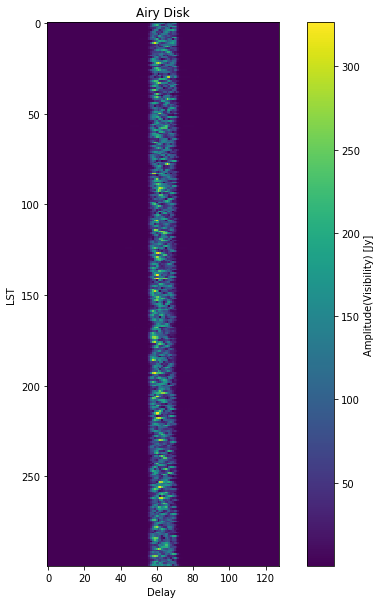

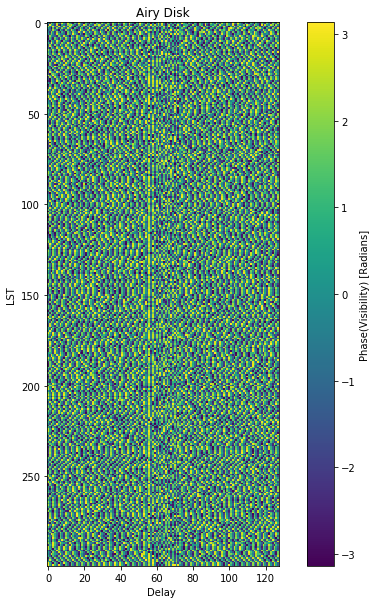

In [51]:
plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.abs(ddata_ad[:300,:]))
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Amplitude(Visibility) [Jy]')
plt.show()

plt.figure(figsize =(10,10))
plt.title("Airy Disk")
plt.imshow(np.angle(ddata_gb[:300,:]))
plt.xlabel('Delay ')
plt.ylabel('LST ')
plt.colorbar(label= r'Phase(Visibility) [Radians]')
plt.show()


$\textbf{2D Power Spectrum}$

In [69]:
def get_1d_delay_ps(data,dish_diam,frqs):
    
    window    = signal.nuttall(frqs.size)
    bandwidth = get_bandwidth(window,frqs)
    
    z_values = [get_redshift(f_0,frqs[j]) for j in range(frqs.size)]
    
    comoving_trans_distance= cosm.comoving_transverse_distance(z_values)
    comoving_width  = get_comoming_width(z_values,bandwidth)
    
    omega_gb =omega_gaussian_beam(dish_diam,frqs)
    
    ddata = get_delay_vis(data*jy2mK,window,frqs*10**-3)[1]
    
    wavelen = [3e8/(frqs[i]*10**6) for i in range(frqs.size)]
    T1= [np.power((wavelen[i]**2)*(1.0/CNST1.k),2) for i in range(len(wavelen))]
    T2 =[(comoving_trans_distance[i]**2)*((comoving_width[i])/(omega_gb*bandwidth**2)) for i in range(len(z_values))]
    print T1,T2.
    #ps_coeiff = T1*T2
    #ps = ps_coeiff*ddata
    
    #return ps
    
    
    